#### Airbnb Data Exploration over Boston

Based on Cross-Industry Standard Process of Data Mining (CRISP-DM), the Boston Airbnb datasets was collected and investigated. Three bisinuess questions were asked and answered:

- Which neighbourhoods have best user ratings?
- What are the top amenities people needs most?
- What are the most important features to estimate Airbnb rental price?



In [5]:
%reset
import numpy as np
import pandas as pd
import numbers
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from collections import defaultdict

import seaborn as sns
%matplotlib inline

# Importing datasets
listings = pd.read_csv('data/listings_Milan.csv')
#reviews = pd.read_csv('data/reviews.csv')
listings.head()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20190712060953,2019-07-12,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The two floors apartment guarantee privacy to ...,"Enjoy your stay at The Studio, a light-filled ...",none,The neighborhood is quiet and very well connec...,...,f,f,flexible_new,f,f,1,0,1,0,0.11
1,23986,https://www.airbnb.com/rooms/23986,20190712060953,2019-07-12,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,In Milano : A comfortable and very quiet typic...,I look forward to welcoming you in my flat; it...,none,NaN,...,f,f,moderate_new,f,f,1,1,0,0,0.14
2,28300,https://www.airbnb.com/rooms/28300,20190712060953,2019-07-12,nice flat near the park,Bella camera in appartamento col terrazzo all'...,I rent one room in Milan for short stays . Bre...,I rent one room in Milan for short stays . Bre...,none,la zona è piena di piccoli ristorantini e loca...,...,f,f,flexible_new,f,f,1,0,1,0,0.83
3,32119,https://www.airbnb.com/rooms/32119,20190712060953,2019-07-12,Nico & Cynthia's Easy Yellow Suite,NaN,Do you visit Milan for short periods (training...,Do you visit Milan for short periods (training...,none,NaN,...,f,f,moderate_new,f,f,4,4,0,0,0.14
4,32649,https://www.airbnb.com/rooms/32649,20190712060953,2019-07-12,Nico&Cinzia's Red Easy Suite!,Larger group can book Red and Pink (rooms/4653...,Do you visit Milan for short periods (training...,Larger group can book Red and Pink (rooms/ (Ph...,none,"Flat It's located in north side of milan, jus...",...,f,f,moderate_new,f,f,4,4,0,0,0.27


Our dataset is composed of 6264 accomodations based in Milan. For each accomodation, 106 attributes are provided. We now search for which of them. Let's see which features we have here:

In [233]:
listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## Data Understanding:

First of all, we look at the features available and which is the ratio of na values. We can see from the plot below that some features are always missing, therefore we can exclude them from our analysis. Moreover, column with very high na ration can be converted into boolean column to identify wether the data is actually present, so that we can exclude them from the dataset.

Text(0, 0.5, 'Count')

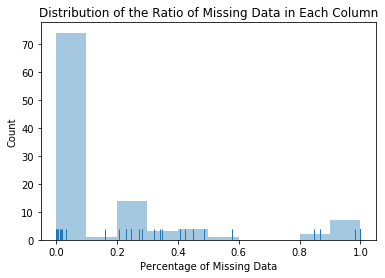

In [6]:
# Plot the Ratio of missing data for all Column

null_list = listings.isna().mean()

na_distribution = sns.distplot(null_list, kde=False, rug=True)
na_distribution.set_title('Distribution of the Ratio of Missing Data in Each Column')
na_distribution.set_xlabel('Percentage of Missing Data')
na_distribution.set_ylabel('Count')



Looking at the the distribution above, I'm going to exclude all the columns with a NA ratio greater than 80%

In [7]:
col_to_drop = listings.loc[:,listings.isna().mean()> 0.8].columns.to_list()
#col_isna = listings.loc[:,col_to_drop].isna()
cleaned_listings = listings.drop(col_to_drop, axis = 1)
#cleaned_listings = pd.concat([cleaned_listings, col_isna], axis = 1)
cleaned_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20190712060953,2019-07-12,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The two floors apartment guarantee privacy to ...,"Enjoy your stay at The Studio, a light-filled ...",none,The neighborhood is quiet and very well connec...,...,f,f,flexible_new,f,f,1,0,1,0,0.11
1,23986,https://www.airbnb.com/rooms/23986,20190712060953,2019-07-12,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,In Milano : A comfortable and very quiet typic...,I look forward to welcoming you in my flat; it...,none,NaN,...,f,f,moderate_new,f,f,1,1,0,0,0.14
2,28300,https://www.airbnb.com/rooms/28300,20190712060953,2019-07-12,nice flat near the park,Bella camera in appartamento col terrazzo all'...,I rent one room in Milan for short stays . Bre...,I rent one room in Milan for short stays . Bre...,none,la zona è piena di piccoli ristorantini e loca...,...,f,f,flexible_new,f,f,1,0,1,0,0.83
3,32119,https://www.airbnb.com/rooms/32119,20190712060953,2019-07-12,Nico & Cynthia's Easy Yellow Suite,NaN,Do you visit Milan for short periods (training...,Do you visit Milan for short periods (training...,none,NaN,...,f,f,moderate_new,f,f,4,4,0,0,0.14
4,32649,https://www.airbnb.com/rooms/32649,20190712060953,2019-07-12,Nico&Cinzia's Red Easy Suite!,Larger group can book Red and Pink (rooms/4653...,Do you visit Milan for short periods (training...,Larger group can book Red and Pink (rooms/ (Ph...,none,"Flat It's located in north side of milan, jus...",...,f,f,moderate_new,f,f,4,4,0,0,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20760,36623040,https://www.airbnb.com/rooms/36623040,20190712060953,2019-07-12,★NEW! Duomo Elegant Apartment x 4!,Elegante bilocale appena ristrutturato in pien...,NaN,Elegante bilocale appena ristrutturato in pien...,none,L'appartamento si trova nel pieno del centro s...,...,t,f,strict_new,f,f,1,1,0,0,NaN
20761,36623223,https://www.airbnb.com/rooms/36623223,20190712060953,2019-07-12,A nest in Brera - Milano it's the city,"Hello everyone, my name is Maurizio and I'd lo...",The apartment is a 1 bedroom apartment located...,"Hello everyone, my name is Maurizio and I'd lo...",none,"The neighbourhood is vibrant, it's called Mosc...",...,t,f,moderate_new,f,f,2,2,0,0,NaN
20762,36623985,https://www.airbnb.com/rooms/36623985,20190712060953,2019-07-12,Casa Giulia e Iuri,bella casa con mobili di design nel centro sto...,divano letto matrimoniale molto comodo,bella casa con mobili di design nel centro sto...,none,il più antico della città,...,t,f,flexible_new,f,f,1,0,1,0,NaN
20763,36632658,https://www.airbnb.com/rooms/36632658,20190712060953,2019-07-12,AppartSuite Blue At 10 Minuts To The Center,L'appartamento è completamente ristrutturato a...,L'alloggio Si trova in un quartiere multietnic...,L'appartamento è completamente ristrutturato a...,none,NaN,...,t,f,flexible_new,f,f,4,4,0,0,NaN


We also want to remove some technical columns which are not of our interest at the moment, as urls

In [8]:
urls = cleaned_listings[[col for col in cleaned_listings.columns if '_url' in col]].columns.tolist()
cleaned_listings.drop(urls, axis = 1, inplace = True)
cleaned_listings.shape

(20765, 92)

## 1. Which are the best neighbourhoods to stay in Milan?

93.42358803986711

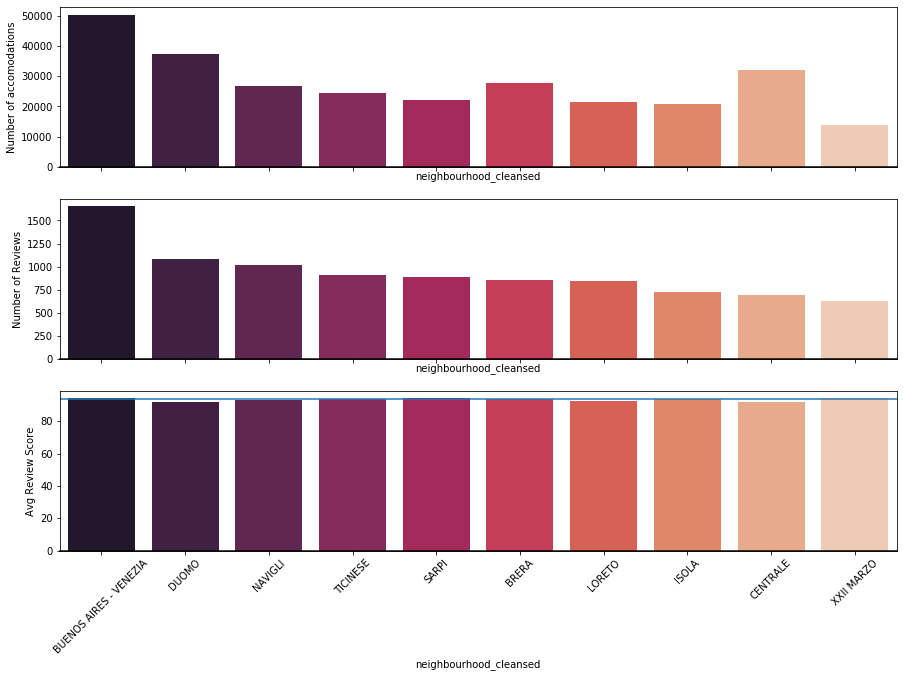

In [50]:
popularity = cleaned_listings.groupby(['neighbourhood_cleansed']).agg(
    avg_review_score=pd.NamedAgg(column='review_scores_rating', aggfunc='mean'), 
    sum_number_reviews=pd.NamedAgg(column='number_of_reviews', aggfunc='sum'),
    count_accomodations=pd.NamedAgg(column = 'id', aggfunc = 'count')
).sort_values(by =['count_accomodations'], ascending= False)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
x = popularity.iloc[:10,].index
y1 = popularity['count_accomodations'].iloc[:10,]
y2 = popularity['sum_number_reviews'].iloc[:10,]
y3 = popularity['avg_review_score'].iloc[:10,]

# Number of accomodations
sns.barplot(x=x, y=y2, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Number of accomodations")

# Reviews Number
sns.barplot(x=x, y=y1, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Number of Reviews")

# Avg Review Score
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Avg Review Score")
ax3.axhline( cleaned_listings['review_scores_rating'].mean())
plt.xticks(rotation=45)

cleaned_listings['review_scores_rating'].mean()


There's no big difference between average ratings in Milan, while there's a huge difference in terms of number of accomodations and reviews. The most popular place, according both the number of housing and number of reviews is Porta Venezia / Corso Buenos Aires, followed by Duomo area. The Central Station area has an interesting high number of reviews, making it be ranked in the top 3, but not as many housing.  

### Price distribution over neighbourhood

[(0, 350)]

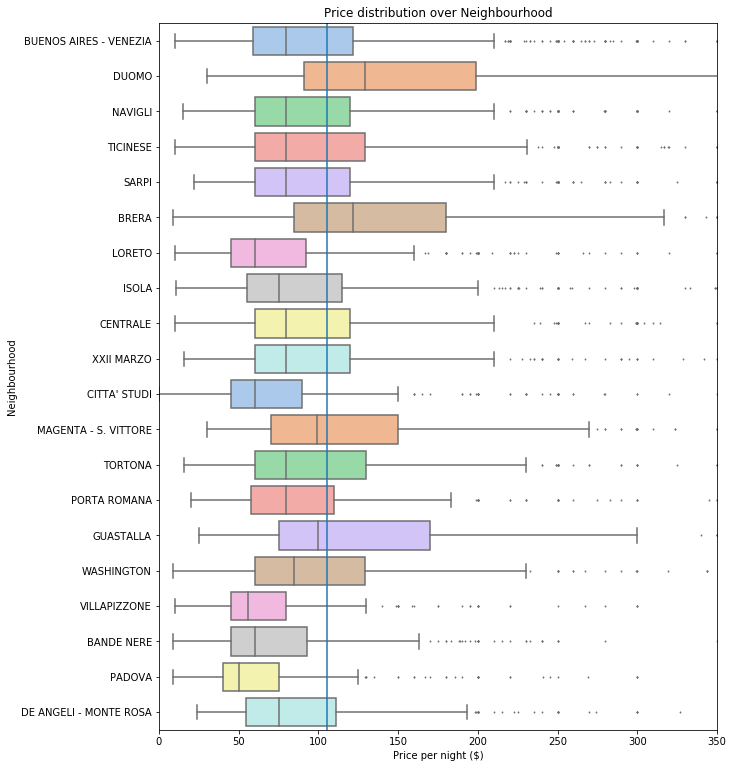

In [27]:
fig, ax = plt.subplots(figsize=(10, 13))
ax = sns.boxplot(y="neighbourhood_cleansed", x="price", data=cleaned_listings_w_amenities, 
                 palette="pastel", order= popularity.sort_values(by =['count_accomodations'], ascending= False).iloc[:20].index, fliersize= 1)
ax.axvline( cleaned_listings_w_amenities['price'].mean())
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Price per night ($)")
ax.set_title('Price distribution over Neighbourhood')
ax.set(xlim=(0, 350))

## Price distribution over Room Type and Neighbourhood

In [29]:
avg_price_per_room_type = cleaned_listings_w_amenities[['neighbourhood_cleansed', 'room_type','price']].dropna(subset=['price'], axis=0).groupby(
    ['neighbourhood_cleansed', 'room_type']).mean().reset_index()

cols_to_plot = list(popularity.sort_values(by =['count_accomodations'], ascending= False).iloc[:20].index)
cols_to_plot.remove('MAGENTA - S. VITTORE')

avg_price_per_room_type = avg_price_per_room_type.loc[avg_price_per_room_type['neighbourhood_cleansed'].apply(lambda x: x in cols_to_plot),:]

avg_price_per_room_type_table = pd.pivot_table(avg_price_per_room_type, values='price', index=['neighbourhood_cleansed'],columns=['room_type'], aggfunc=np.sum)

avg_price_per_room_type_table

room_type,Entire home/apt,Private room,Shared room
neighbourhood_cleansed,,,
BANDE NERE,103.646091,53.643478,50.750000
BRERA,175.744565,108.125000,73.000000
BUENOS AIRES - VENEZIA,118.963149,74.836028,47.619048
CENTRALE,114.418386,114.553333,28.333333
CITTA' STUDI,86.994652,60.308108,39.076923
DE ANGELI - MONTE ROSA,106.200758,65.791045,70.000000
DUOMO,171.236842,130.575342,44.142857
GUASTALLA,159.125698,115.000000,92.500000
ISOLA,113.780357,79.895425,31.200000


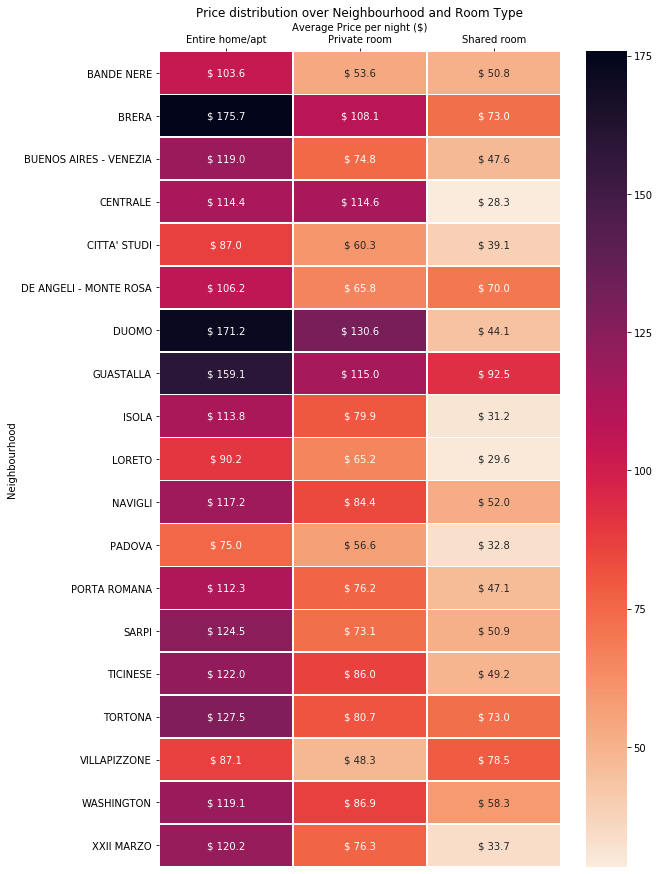

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 15))
cmap = sns.cm.rocket_r
sns.heatmap(avg_price_per_room_type_table, annot=True, fmt=".1f", linewidths=.5, cmap = cmap)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Average Price per night ($)")
ax.set_title('Price distribution over Neighbourhood and Room Type')

for t in ax.texts:
    t.set_text('$ {:,.1f}'.format(float(t.get_text())))
    
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(avg_price_per_room_type, cmap=cmap, vmax=.3, vmin=0, center=0, linewidths=.5, cbar_kws={"shrink": .5})

## 2. What are the most popular amenities in Milanese accomodations?

In [10]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


In [11]:
amenities_list = cleaned_listings['amenities'].apply( lambda x : str.strip(x, '{}').split(','))
flatten = lambda l: [item for sublist in l for item in sublist]
possible_values = set(flatten(amenities_list))
possible_values.discard('')
possible_values = list(possible_values)

In [12]:
amenities = cleaned_listings['amenities'].value_counts().reset_index()
amenities.rename(columns={'index': 'amenity', 'amenities': 'count'}, inplace=True)
amenities = total_count(amenities, 'amenity', 'count', possible_values)
amenities.set_index('amenity', inplace=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

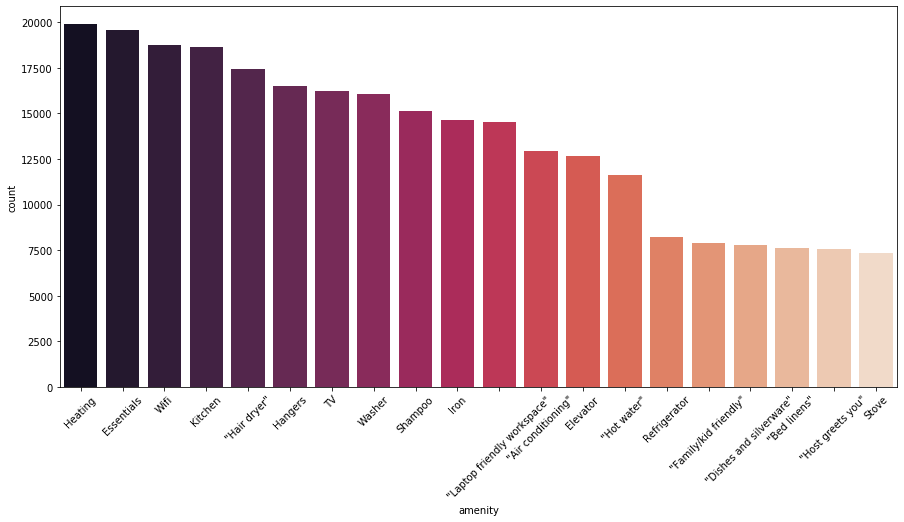

In [13]:
top20_am = amenities.sort_values(by =['count'], ascending= False).iloc[:20,]

# Amenities Popoularity
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=top20_am.index, y=top20_am['count'], palette="rocket", ax=ax)
plt.xticks(rotation=45)

## 3. What are the most important features to estimate Airbnb rental price in Milan area?

In [14]:
def parsing(element):
    if element == '{}':
        return []
    
    # Parse an element that is between {}
    if element[0] == '{' and element[-1] == '}':
        return parsing(element[1:-1])
    
    element_list = []
    last_element = ''
    found_quote = False
    for character in element:
        if character == ',' and not found_quote:
            element_list.append(last_element.strip('"'))
            last_element = ''
            continue
        
        if character == '"':
            found_quote = not found_quote
        
        last_element += character
    
    if len(last_element) > 0:
        element_list.append(last_element.strip('"'))
        
    return element_list

In [15]:
def string_array_handler (df, string_col):
    '''
    INPUT
    df: pandas dataframe 
    string_col: name of column to be splitted in columns
    
    OUTPUT
    X: pandas dataframe with all column of possible values of string_col dummified
    '''
    str_list = {element: parsing(element.lower()) for element in cleaned_listings[string_col]}
    flatten = lambda l: [item for sublist in l for item in sublist]
    possible_values = set(flatten(str_list.values()))
    
    new_df = pd.DataFrame()
    for value in possible_values:
        new_df[value] = df[string_col].apply(lambda element: 1 if value in str_list[element] else 0)
    
    return new_df

Transform amenities list in dummy columns

In [16]:
amenities_df = string_array_handler(cleaned_listings, 'amenities')
cleaned_listings_w_amenities = pd.concat([cleaned_listings, amenities_df], axis=1)
cleaned_listings_w_amenities.shape

(20765, 276)

In [17]:
cleaned_listings_w_amenities.select_dtypes(include=['object']).copy().columns
#cleaned_listings['has_availability']

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_pictur

Transfor string variables as numeric (removing special characters as $ or %)

In [18]:
string_to_number_cols = ['price','cleaning_fee','extra_people','security_deposit', 'host_response_rate']

cleaned_listings_w_amenities[string_to_number_cols]

cleaned_listings_w_amenities['price'].dtype == 'object'

for col in string_to_number_cols:
    cleaned_listings_w_amenities[col] = pd.to_numeric(cleaned_listings_w_amenities.loc[:,col].apply( lambda x :  x if isinstance(x, float) else str.strip(x, '$%'))
                                                      , errors='coerce')


Transform dates in age

In [19]:
cleaned_listings_w_amenities['first_review_age'] = cleaned_listings_w_amenities['first_review'].apply(lambda date :(pd.to_datetime('today').year-pd.to_datetime(date).year))
cleaned_listings_w_amenities['host_since_age'] = cleaned_listings_w_amenities['host_since'].apply(lambda date :(pd.to_datetime('today').year-pd.to_datetime(date).year))

Extract features I want to consider during modeling phase

In [20]:
numeric_vars = cleaned_listings_w_amenities.select_dtypes(include=[np.number]).columns.tolist()
to_drop = ['id', 'scrape_id', 'host_id', 'latitude', 'longitude', 'host_listings_count','host_total_listings_count', 
           
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
          'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
           'availability_30',
 'availability_60',
 'availability_90',
 'availability_365']
numeric_vars = [x for x in numeric_vars if x not in to_drop]
str_vars = ['neighbourhood_cleansed', 'property_type', 'room_type',
            'bed_type','instant_bookable', 'host_is_superhost',
            'host_response_time', 'cancellation_policy' ]
vars_to_consider = numeric_vars+str_vars
vars_to_consider

['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'oven',
 'outlet covers',
 'room-darkening shades',
 'double oven',
 'printer',
 'sauna',
 'stove',
 'pets live on this property',
 'ethernet connection',
 'changing table',
 'steam oven',
 'first aid kit',
 'paid parking on premises',
 'pets allowed',
 'pool',
 'wide entryway',
 'terrace',
 'well-lit path to entrance',
 'smart tv',
 'wheelchair accessible',
 'paid parking off premises',
 'dishwasher',
 'fixed grab bars for shower',
 'espresso machine',
 'microwave',
 'heating',
 'central air condit

In [21]:
# Borrowed from Lecture
def clean_data(df, response_col):
    '''
    INPUT
    df: pandas dataframe 
    response_col: responsed column name
    
    OUTPUT
    X: A matrix holding all of the variables you want to consider when predicting the response
    y: the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no response
    2. Create X as all the columns that are not the response column
    3. Create y as the response column
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing response_col values
    df = df.dropna(subset=[response_col], axis=0)
    y = df[response_col]
    
    # Drop response_col column
    df = df.drop([response_col], axis = 1)
    
    # num_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    # X.fillna(X[num_vars].mean(), inplace = True)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    return df, y
    
#Use the function to create X and y
X, y = clean_data(cleaned_listings_w_amenities.loc[:,vars_to_consider], 'price')
X.shape

(20677, 333)

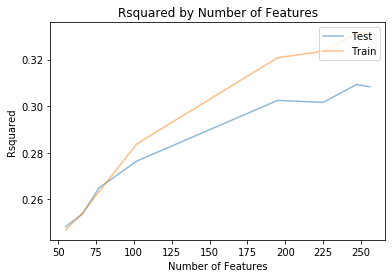

In [22]:
# Borrowed from Lecture
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [23]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
66,bathroom essentials,1.457591e+14,1.457591e+14
65,bedroom comforts,-1.457591e+14,1.457591e+14
145,toilet paper,2.544775e+13,2.544775e+13
47,body soap,-1.892730e+13,1.892730e+13
93,bath towel,-6.520451e+12,6.520451e+12
222,property_type_Boutique hotel,1.357846e+02,1.357846e+02
246,cancellation_policy_super_strict_60_new,1.216751e+02,1.216751e+02
195,neighbourhood_cleansed_PARCO SEMPIONE,7.943323e+01,7.943323e+01
161,neighbourhood_cleansed_BRERA,7.939784e+01,7.939784e+01
170,neighbourhood_cleansed_DUOMO,7.625082e+01,7.625082e+01


In [44]:
x_corr = cleaned_listings_w_amenities[numeric_vars].corr()
abs(x_corr['price']).sort_values(ascending = False)[:30].index

['price', 'accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms',
       'beds', 'security_deposit','free street parking', 'reviews_per_month', 'number_of_reviews',
       'guests_included', 'air conditioning', 'tv', 'espresso machine',
       'calculated_host_listings_count', 'dryer', 'hot water',
       'review_scores_location', 'extra pillows and blankets', 'lock on bedroom door',
       'indoor fireplace', 'cooking basics', 'private entrance', 'dishwasher', 'hot tub',
       'cable tv', 'bed linens', 'no stairs or steps to enter']

Index(['price', 'accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms',
       'beds', 'security_deposit', 'number_of_reviews_ltm',
       'free street parking', 'reviews_per_month', 'number_of_reviews',
       'guests_included', 'air conditioning', 'tv',
       'calculated_host_listings_count', 'dryer', 'hot water',
       'review_scores_location', 'extra pillows and blankets',
       'translation missing: en.hosting_amenity_50', 'lock on bedroom door',
       'indoor fireplace', 'cooking basics', 'private entrance',
       'translation missing: en.hosting_amenity_49', 'dishwasher', 'hot tub',
       'cable tv', 'bed linens', 'no stairs or steps to enter'],
      dtype='object')

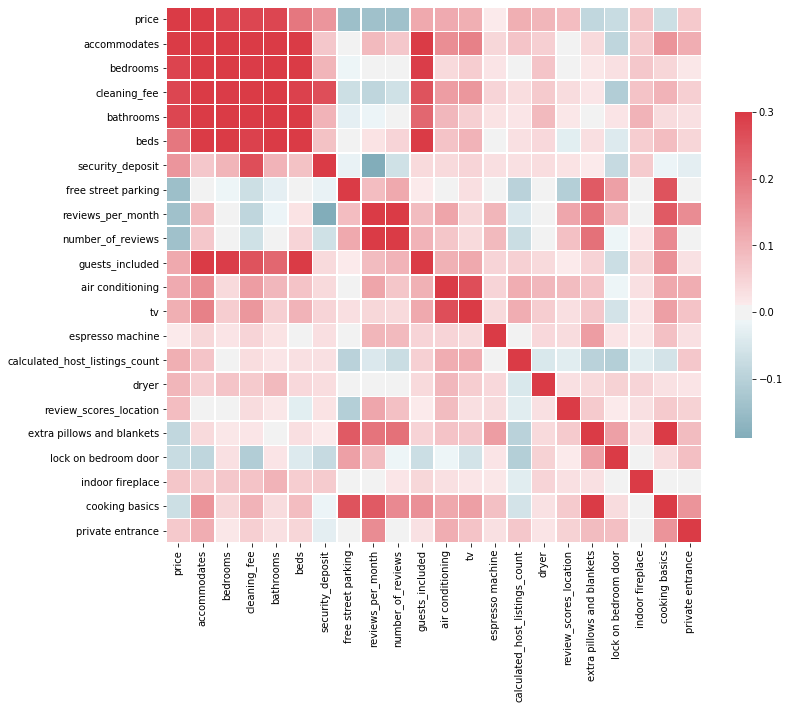

In [49]:
x_corr = cleaned_listings_w_amenities[numeric_vars].corr()
cols_to_plot = ['price', 'accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms',
       'beds', 'security_deposit','free street parking', 'reviews_per_month', 'number_of_reviews',
       'guests_included', 'air conditioning', 'tv', 'espresso machine',
       'calculated_host_listings_count', 'dryer',
       'review_scores_location', 'extra pillows and blankets', 'lock on bedroom door',
       'indoor fireplace', 'cooking basics', 'private entrance']
corr_plot = cleaned_listings_w_amenities[cols_to_plot].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_plot,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})